# Part I - Ford Go Bike Data Exploration
## by Cliffod Effum

## Introduction
> This is a capstone project required to obtain a nano degree in Data Analytics from Udacity. In this project, I am demonstrating the importance of data visualization techniques in data analysis using a data set which includes information about individual rides made in a bike-sharing system (Fordgobike) covering the greater San Francisco Bay area in Carlifornia for February, 2019.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from math import radians, cos, sin, asin, sqrt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(10)

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   
6             300.0                              Palm St at Willow St   
7              10.0                        Washington St at Kearny St   
8              10.0                        Washington St at Kearny St   
9              19.0                              Post St at Kearny St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   
6               37.317298              -121.884995           312.0   
7               37.795393              -122.404770           127.0   
8               37.795393              -122.404770           127.0   
9               37.788975              -122.403452           121.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   
6                      San Jose Diridon Station             37.329732   
7                        Valencia St at 21st St             37.756708   
8                        Valencia St at 21st St             37.756708   
9                            Mission Playground             37.759210   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   
6            -121.901782     3803  Subscriber             1983.0   
7            -122.421025     6329  Subscriber             1989.0   
8            -122.421025     6548  Subscriber             1988.0   
9            -122.421339     6488  Subscriber             1992.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1        

In [3]:
print(df['start_time'].min())
print(df['start_time'].max())
print(df['end_time'].min())
print(df['end_time'].max())

2019-02-01 00:00:20.6360
2019-02-28 23:59:18.5480
2019-02-01 00:04:52.0580
2019-03-01 08:01:55.9750


In [4]:
df['start_station_name'].value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [5]:
print(df.shape)
print(df.dtypes)
print(df.columns)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')


In [6]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

### What is the structure of your dataset?

> There are 183,412 observations in the data set with 16 variables as shown in the table below.

|Variable | Data type |
| --- | --- |
| duration_sec | integer |
| start_time | string |
| end_time | string |
| start_station_id | float64 |
| start_station_name | string |
| start_station_latitude | float64 |
| start_station_longitude | float64 |
| end_station_id | float64 |
| end_station_name | string |
| end_station_latitude | float64 |
| end_station_longitude | float64 |
| bike_id | int64 |
| user_type | string |
| member_birth_year | float64 |
| member_gender | string |
| bike_share_for_all_trip | string |


Numeric variables outnumber strings.
The time variables are strings which need to be converted to datetime. These can be further disintegrated into year, month, day, hours and minutes.
member_birth_year should be integer


### What is/are the main feature(s) of interest in your dataset?

>
   - The population charateristics of riders is of interest to me. The member_year_birth and gender can help to achieve this
   - What is the most popular start and end stations for most riders.
   - In which time of the day do people hire bicycles the most.
   - What is the distribution of bikes hired per month. This can help me to know the season in which bikes are rented the most.
   - What influences the distribution of bike rental.
      

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>
  - How long do people usually ride (duriation_sec). Assuming that all users are rational, subscribers are also more likely to ride longer than customers because subscribers pay a fixed rate whiles the amount customers pay is subject to the duration of their rental. 
  - I expect there to be more younger riders than older ones due to their physical abilities. I also assume there to be more male riders than females.
  - I expect there to be less rides during the winter months (start and end times).
  


## Data Wrangling 

### Create copy of data set


In [7]:
df_clean = df.copy()

### Getting time parameters


In [8]:
# convert start_time to date and time
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['start_time'] = pd.to_datetime(df_clean['start_time']).dt.time

# convert end_time to date and time
df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date
df_clean['end_time'] = pd.to_datetime(df_clean['end_time']).dt.time

# extract day from date
df_clean['start_day'] = df_clean['start_date'].apply(lambda d: d.day)
df_clean['end_day'] = df_clean['end_date'].apply(lambda d: d.day)


In [9]:
#dt.datetime.strptime('January 11, 2010', '%B %d, %Y').strftime('%a')

In [10]:
# derive duration_min and duration_hr from duration_sec
df_clean['duration_min'] = df_clean['duration_sec'] / 60
df_clean['duration_hr'] = df_clean['duration_min'] / 60

# conver their d_types to float
df_clean['duration_min'] = df_clean['duration_min'].astype('float')
df_clean['duration_hr'] = df_clean['duration_hr'].astype('float')

# round them to 2 decimal places
df_clean['duration_min'] = df_clean['duration_min'].round(2)
df_clean['duration_hr'] = df_clean['duration_hr'].round(2)

In [11]:
df_clean['start_time'] = pd.to_datetime(df['start_time'])
df_clean['end_time'] = pd.to_datetime(df['end_time'])


In [12]:
# get weekdays from end and start times
df_clean2 = df.copy()
df_clean2['start_time'] = pd.to_datetime(df_clean2['start_time'])
df_clean2['end_time'] = pd.to_datetime(df_clean2['end_time'])

# extract start time weekdays
df_clean['start_time_day'] = df_clean2['start_time'].dt.strftime('%a')
df_clean['end_time_day'] = df_clean2['end_time'].dt.strftime('%a')

# extract start and end time month
df_clean['start_time_month'] = df_clean2['start_time'].dt.strftime('%b')
df_clean['end_time_month'] = df_clean2['end_time'].dt.strftime('%b')

# extract start hour and end hour
df_clean['start_hr'] = df_clean2['start_time'].dt.strftime('%H')
df_clean['end_hr'] = df_clean2['end_time'].dt.strftime('%H')

# order the days of the week
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_order = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_day'] = df_clean['start_time_day'].astype(day_order)
df_clean['end_time_day'] = df_clean['end_time_day'].astype(day_order)


In [13]:
df_clean.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1                            Berry St at 4th St             37.775880  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   

   start_day  end_day duration_min  duration_hr start_time_day end_time_day  \
0         28        1       869.75        14.50            Thu          Fri   
1         28        1       708.68        11.81            Thu          Fri   
2         28        1      1030.90        17.18            Thu          Fri   
3         28        1       608.17        10.14            Thu          Fri   
4         28        1        26.42         0.44            Thu          Fri   

  start_time_month end_time_month  start_hr  end_hr  
0              Feb            Mar        17      08  
1              Feb            Mar        18      06  
2              Feb            Mar        12      05  
3              Feb            Mar        17      04  
4              Feb            Mar        23      00  

[5 rows x 28 columns]

In [14]:
sum(df_clean.duplicated())

0

In [15]:
df_clean.shape

(183412, 28)

In [16]:
df_clean.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_date                    0
end_date                      0
start_day                     0
end_day                       0
duration_min                  0
duration_hr                   0
start_time_day                0
end_time_day                  0
start_time_month              0
end_time_month                0
start_hr                      0
end_hr                        0
dtype: int64

In [17]:
# drop rows which have null values
df_clean = df_clean[df_clean['member_birth_year'].notnull()]
df_clean = df_clean[df_clean['start_station_id'].notnull()]

In [18]:
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_date                 0
end_date                   0
start_day                  0
end_day                    0
duration_min               0
duration_hr                0
start_time_day             0
end_time_day               0
start_time_month           0
end_time_month             0
start_hr                   0
end_hr                     0
dtype: int64

In [19]:
# change member_birth_year to int
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')

In [20]:
df_clean['member_age'] = 2017 - df_clean['member_birth_year']

In [21]:
df_clean.member_age.describe()

count    174952.000000
mean         32.196865
std          10.118731
min          16.000000
25%          25.000000
50%          30.000000
75%          37.000000
max         139.000000
Name: member_age, dtype: float64

In [22]:
# find distance travelled using the pytagoras theorem
df_clean['distance'] = np.sqrt((df_clean.start_station_longitude - df_clean.end_station_longitude) ** 2
                               + (df_clean.start_station_latitude - df_clean.end_station_latitude) ** 2) * 100
              

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### What is the distribution of customers by gender?

Text(0.5, 0, 'Gender')

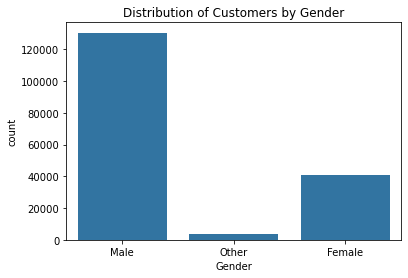

In [23]:
base_color = sb.color_palette()[0]
g = sb.countplot(data = df_clean, x = 'member_gender', color = base_color)
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')

> Most riders are males

### What are the Top 10 Start & end  Stations?

Text(0.5, 1.0, 'Top 10 Starting Points')

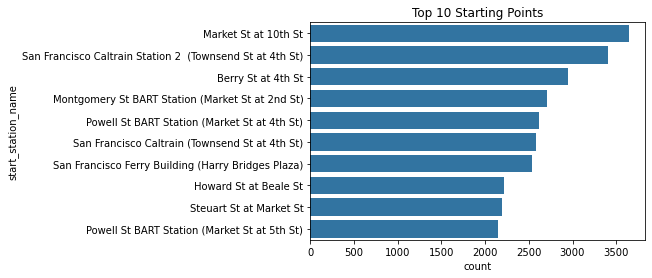

In [24]:
top_starting_points = df_clean['start_station_name'].value_counts().head(10)
top_starting_points_df = df_clean[df_clean['start_station_name'].isin(top_starting_points.index)]
sb.countplot(data = top_starting_points_df, y = 'start_station_name', color = base_color, order = top_starting_points.index)
plt.title('Top 10 Starting Points')


> The most frequent starting point is Market St at 10th St

Text(0.5, 1.0, 'Top 10 Ending Points')

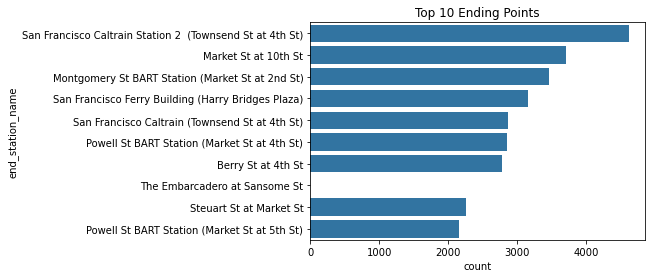

In [25]:
top_ending_points = df_clean['end_station_name'].value_counts().head(10)
top_ending_points_df = df_clean[df_clean['end_station_name'].isin(top_starting_points.index)]
sb.countplot(data = top_ending_points_df, y = 'end_station_name', color = base_color, order = top_ending_points.index)
plt.title('Top 10 Ending Points')

> Most riders end up returning bikes to the San Francisco Caltrain Station 2. 

In [26]:
df_clean['start_end_point'] = df_clean2['start_station_name'] + ' - ' + df_clean2['end_station_name']

<AxesSubplot:xlabel='count', ylabel='start_end_point'>

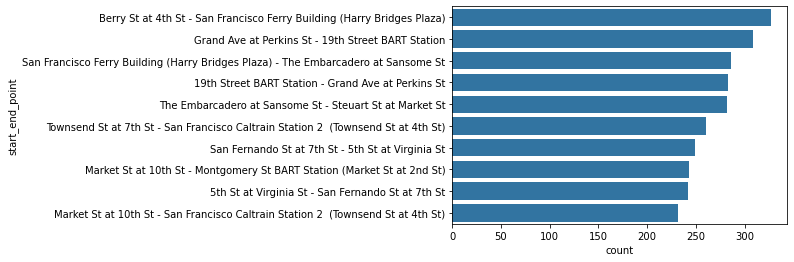

In [27]:
top_start_end = df_clean['start_end_point'].value_counts().head(10)
top_start_end_df = df_clean[df_clean['start_end_point'].isin(top_start_end.index)]
sb.countplot(data = top_start_end_df, y = 'start_end_point', order = top_start_end.index, color = base_color)

> The most start - end station combination is Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza)

In [28]:
df_clean['start_end_point'].value_counts()

Berry St at 4th St - San Francisco Ferry Building (Harry Bridges Plaza)               327
Grand Ave at Perkins St - 19th Street BART Station                                    308
San Francisco Ferry Building (Harry Bridges Plaza) - The Embarcadero at Sansome St    286
19th Street BART Station - Grand Ave at Perkins St                                    283
The Embarcadero at Sansome St - Steuart St at Market St                               282
                                                                                     ... 
Lake Merritt BART Station - MLK Jr Way at 14th St                                       1
Lakeshore Ave at Trestle Glen Rd - College Ave at Taft Ave                              1
MacArthur Blvd at Telegraph Ave - Market St at 8th St                                   1
20th St at Dolores St - Garfield Square (25th St at Harrison St)                        1
11th St at Bryant St - 29th St at Tiffany Ave                                           1
Name: star

### How long do users spend with the bikes?

In [29]:
df_clean['duration_min'].describe()

count    174952.000000
mean         11.733373
std          27.370085
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: duration_min, dtype: float64

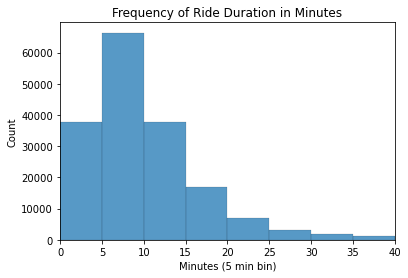

In [30]:
# how long do people usually ride
bins = np.arange(0, df_clean['duration_min'].max()+5, 5)
sb.histplot(df_clean['duration_min'], bins = bins, kde = False)
#plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,40])

plt.title('Frequency of Ride Duration in Minutes')
plt.xlabel('Minutes (5 min bin)')
plt.show()

> Most bikes are rented for 5 - 10 minutes

In [31]:
df_clean2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Distribution by user type

Text(0.5, 0, 'Type of User')

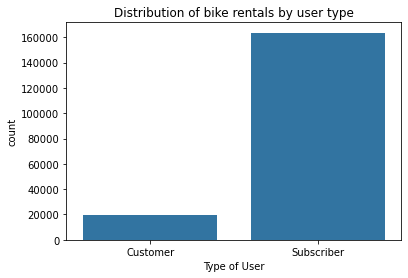

In [32]:
sb.countplot(data = df_clean2, x = 'user_type', color = base_color)
plt.title('Distribution of bike rentals by user type')
plt.xlabel('Type of User')

> Most riders are subscibers 

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='count'>

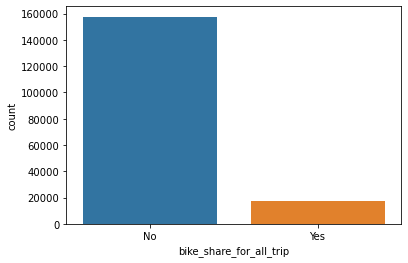

In [33]:
sb.countplot(data = df_clean, x = 'bike_share_for_all_trip')

> Most user of the bike sharing app did not use the service for their whole trip. They probably biked to catch other means of transport.

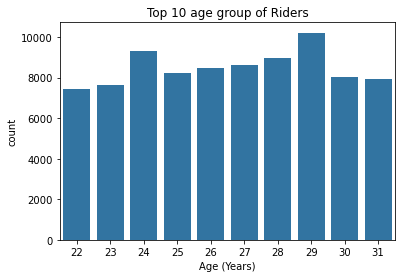

In [34]:
top_user_age = df_clean['member_age'].value_counts().head(10)
top_user_age_df = df_clean[df_clean['member_age'].isin(top_user_age.index)]

#plt.figure(figsize = [20, 5])
g = sb.countplot(data = top_user_age_df, x = 'member_age', color = base_color)
plt.title('Top 10 age group of Riders')
plt.xlabel('Age (Years)');


> The top 10 riders are between 22 and 31 years with those who are 29 years of age dorminating.

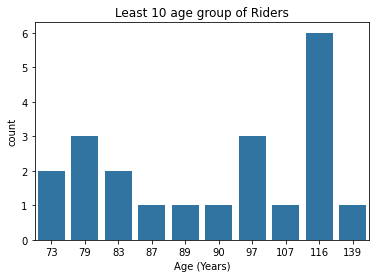

In [35]:
least_user_age = df_clean['member_age'].value_counts().tail(10)
least_user_age_df = df_clean[df_clean['member_age'].isin(least_user_age.index)]

#plt.figure(figsize = [20, 5])
g = sb.countplot(data = least_user_age_df, x = 'member_age', color = base_color)
plt.title('Least 10 age group of Riders')
plt.xlabel('Age (Years)');


### In which day were bikes rented the most

In [36]:
df_clean.end_time_day.unique()

['Fri', 'Thu', 'Wed', 'Tue', 'Mon', 'Sun', 'Sat']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun']

Text(0.5, 1.0, 'Distribution of Bike rental by day of week')

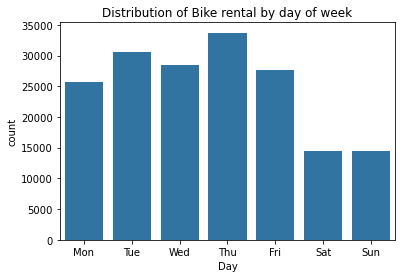

In [37]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df_clean, x = 'start_time_day', color = base_color, order = weekdays)
plt.xlabel('Day')
plt.title('Distribution of Bike rental by day of week')

> The day with the highes number of rental was Thursday while Saturday and Sunday recorded the least

Text(0.5, 1.0, 'Distribution of days on which rental ended')

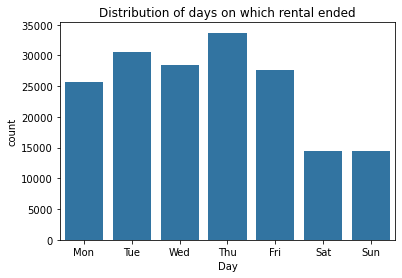

In [38]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df_clean, x = 'end_time_day', color = base_color, order = weekdays)
plt.xlabel('Day')
plt.title('Distribution of days on which rental ended')

In [39]:
df_clean['end_time_day'].value_counts()

Thu    33707
Tue    30591
Wed    28417
Fri    27655
Mon    25641
Sun    14519
Sat    14422
Name: end_time_day, dtype: int64

In [40]:
df_clean['start_time_day'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_time_day, dtype: int64

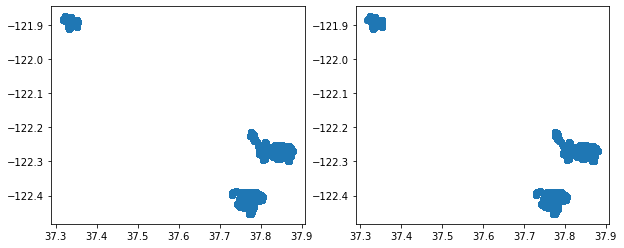

In [41]:
# plot start and end locations to check distance
plt.figure(figsize = [10, 4])
plt.subplot(1, 2, 1)
plt.scatter(df_clean['end_station_latitude'], df_clean['end_station_longitude'])

plt.subplot(1, 2, 2)
plt.scatter(df_clean['start_station_latitude'], df_clean['start_station_longitude'])

> The start and end stations seem to the clustered in the same locations

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

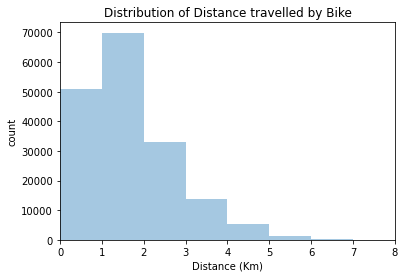

In [42]:

bins = np.arange(0, df_clean['distance'].max() + 50, 1)
g = sb.distplot(df_clean['distance'], bins = bins, kde = False, color = base_color)
plt.xlim([0, 8])
plt.xlabel('Distance (Km)')
plt.title('Distribution of Distance travelled by Bike')
plt.ylabel('count')

> Most people use bicycles within 1-2 km radius while only a few end their rides 5km away from their starting points.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most rides were made on Thurday by both subscribers and random customers. The 1988 year group seem to rent more bikes than any other year category. Most bike were rented from one point and delivered at another. Males appeared to rent bikes more than females. Most of the bikes were rented for 5 to 10 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I dropped rows were the start_station_name was unknown. I had to convert the dataytpe of member_birth_year to integer. I combined the start_station_name and end_station_name in order to get a distribution of the combination of start and end stations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 6.79999999999999, 'day')

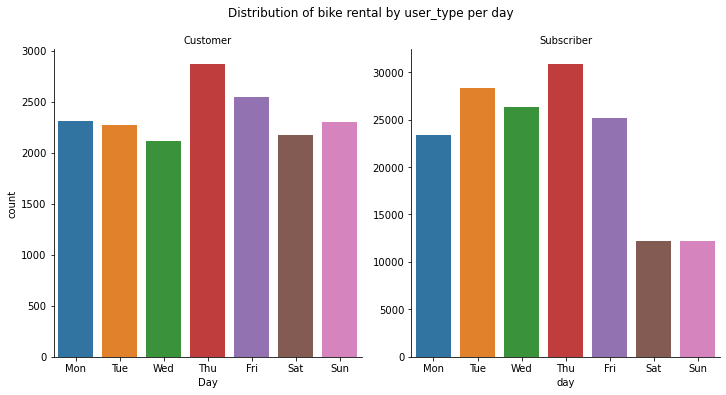

In [43]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#plt.figure(figsize = [10, 2])
g = sb.catplot(data = df_clean, x = 'start_time_day', col = 'user_type', kind = 'count', sharey = False, order = weekdays)

#g.map(sb.countplot, 'start_time_day', order = weekdays)
g.set_xlabels('Day')
g.set_titles('{col_name}')
g.fig.suptitle('Distribution of bike rental by user_type per day', y = 1.05);
plt.xlabel('day')

> Both random cutomers and subscribers used the bike sharing system mostly on Thursday. The proportion of subscribers who used the bike 

Text(0.5, 1.0, 'Relative of Start Days by User Types')

<Figure size 1440x288 with 0 Axes>

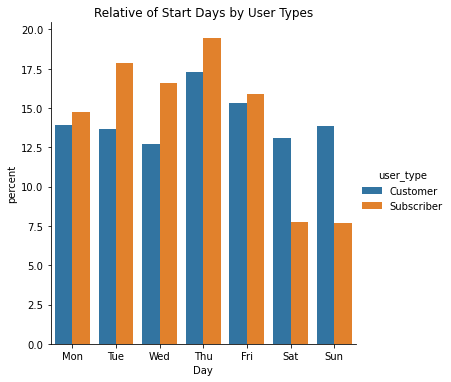

In [44]:
plt.figure(figsize = [20, 4])
df_user_day = df_clean.groupby('user_type')['start_time_day']
rel_freq = df_user_day.value_counts(normalize=True).mul(100)
set_rel_freq_df = rel_freq.rename('percent').reset_index()
#set_rel_freq.pipe((sb.catplot,'data'), x='start_time_day',y='percent',hue= 'user_type',kind='bar')
g = sb.catplot(data = set_rel_freq_df, x = 'start_time_day', y = 'percent', hue = 'user_type', kind = 'bar', order = weekdays)
plt.xlabel('Day')
plt.title('Relative of Start Days by User Types')
#plt.legend(title = 'User Type', loc = 0)

> The relative percentage of random customer who used the bike sharing sytem was higher than subribers only on Saturday and Sunday. Overall, both random customers and subscribers had most rides on Thurday.

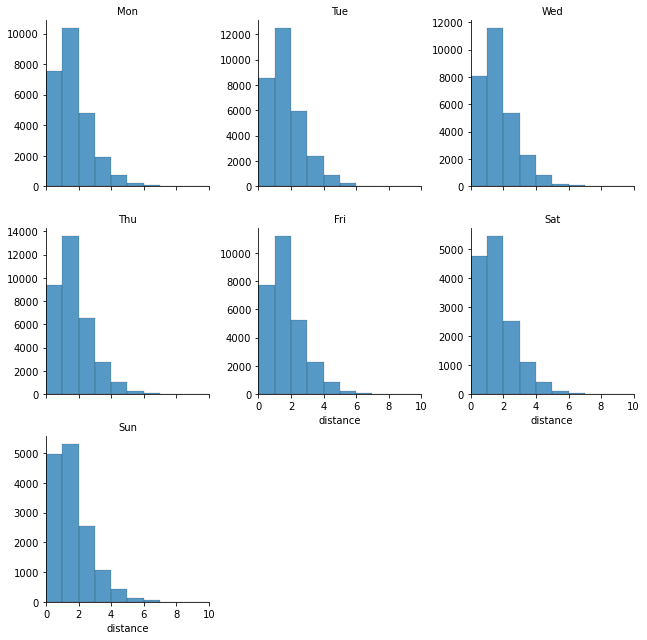

In [45]:
g = sb.FacetGrid(data = df_clean, col = 'start_time_day', col_wrap = 3, sharey = False)
g.map(sb.histplot, 'distance', bins = bins)
plt.xlim([0, 10])
g.set_titles('{col_name}')


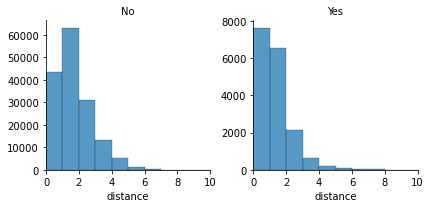

In [46]:
bins = np.arange(0, df_clean['distance'].max() + 1, 1)
g = sb.FacetGrid(data = df_clean, col = 'bike_share_for_all_trip', sharey = False)
g.map(sb.histplot, 'distance', bins = bins)
plt.xlim([0, 10])
g.set_titles('{col_name}')

> Those who use bike for all their trips do not really travel far. They have very short journeys

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1440x288 with 0 Axes>

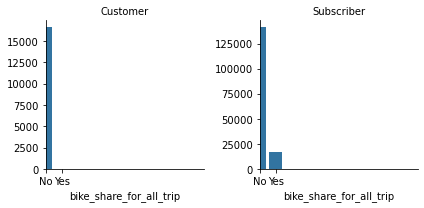

In [47]:
plt.figure(figsize = [20, 4])
g = sb.FacetGrid(data = df_clean, col = 'user_type', sharey = False)
g.map(sb.countplot, 'bike_share_for_all_trip')
plt.xlim([0, 10])
g.set_titles('{col_name}')

> None of the random customers uses the bike share sytem for all of their trips.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.0, 100.0)

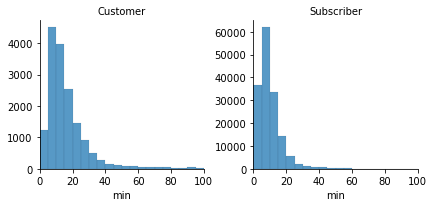

In [48]:
bins = np.arange(0, df_clean['duration_min'].max() + 5, 5)
g = sb.FacetGrid(data = df_clean, col = 'user_type', sharey = False, size = 3)
g.map(sb.histplot, 'duration_min', bins = bins, kde = False)
g.set_titles('{col_name}')
g.set_xlabels('min')
plt.xlim([0, 100])

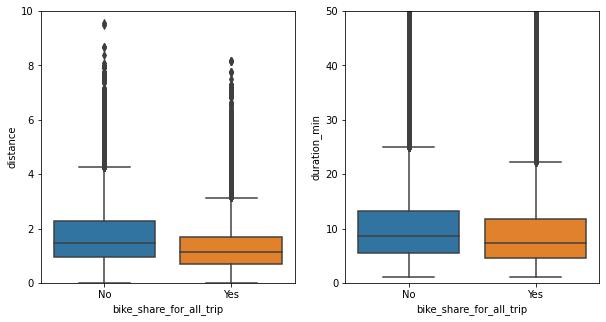

In [49]:

#g = sb.FacetGrid(data = df_clean, col = 'user_type', sharey = False)
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.boxplot(data = df_clean, y = 'distance', x = 'bike_share_for_all_trip',)
plt.ylim([0, 10])
g.set_titles('{col_name}')

plt.subplot(1, 2, 2)
sb.boxplot(data = df_clean, y = 'duration_min', x = 'bike_share_for_all_trip',)
plt.ylim([0, 50])
g.set_titles('{col_name}')


Text(0.5, 1.0, 'Correlation between distance travelled and time spent')

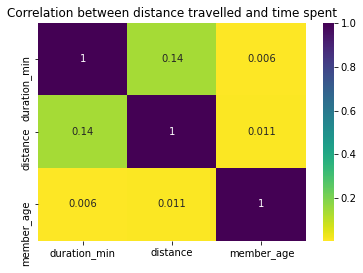

In [50]:
sel_vars = ['start_time_day', 'duration_min', 'distance', 'member_age']
sb.heatmap(df_clean[sel_vars].corr(), annot = True, cmap = 'viridis_r')
plt.title('Correlation between distance travelled and time spent')

> There is a very weak correlation between distance from the start to the end stations. This could be due to the fact that riders probably use bikes for other rounds other than just picking up and dropping them otherwise there is a lot of slack time between when a bike is hired and the actual time needed to end the ride. There is almost no correlation between the age of a rider and both the distance and time spent on cycling.

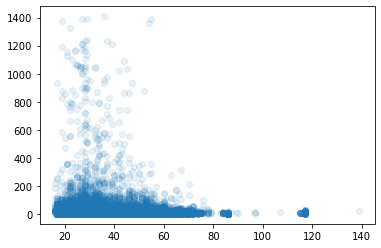

In [51]:
plt.scatter(data = df_clean, y = 'duration_min', x = 'member_age', alpha = 1/10)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is quite strange to observe that the distance travelled by riders does not correspond with the time spent in travelling. This probably could be explain the amount of rentals made by subscribers. Most subscribers keep the bikes longer than it is necessary to make their journey to the end station. It is seen that those who use bikes for all of their trip do not travel far.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. Younger people are expected to ride longer distances than older folks. However, the available data seems to show no correlation in this regard. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### user_type, start_hr and trip duration in minutes

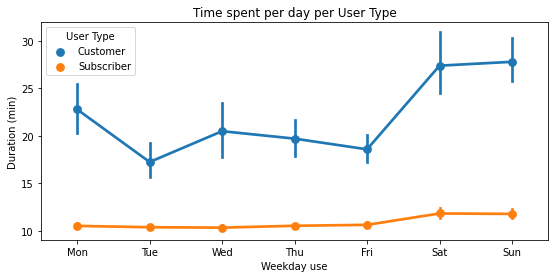

In [52]:
plt.figure(figsize=[20, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=df_clean, x = 'start_time_day', y = 'duration_min', hue = 'user_type')
plt.xlabel('Weekday use')
plt.ylabel('Duration (min)')
plt.title('Time spent per day per User Type')
plt.legend(title = 'User Type', loc = 0)

> The use of bikes peaks on weekends. Probably, people rent bikes for leisure outside of their working days. Subscribers seem to have a regular pattern in their usage. Hence, their lifestyle with respect to the use of bikes does not change drastically on weekends as compared to random customers. Random customers spend about the doupble the time spent by subscribers on cycling.



### Check the distribution hours of the day where bikes are rented by the various user_types

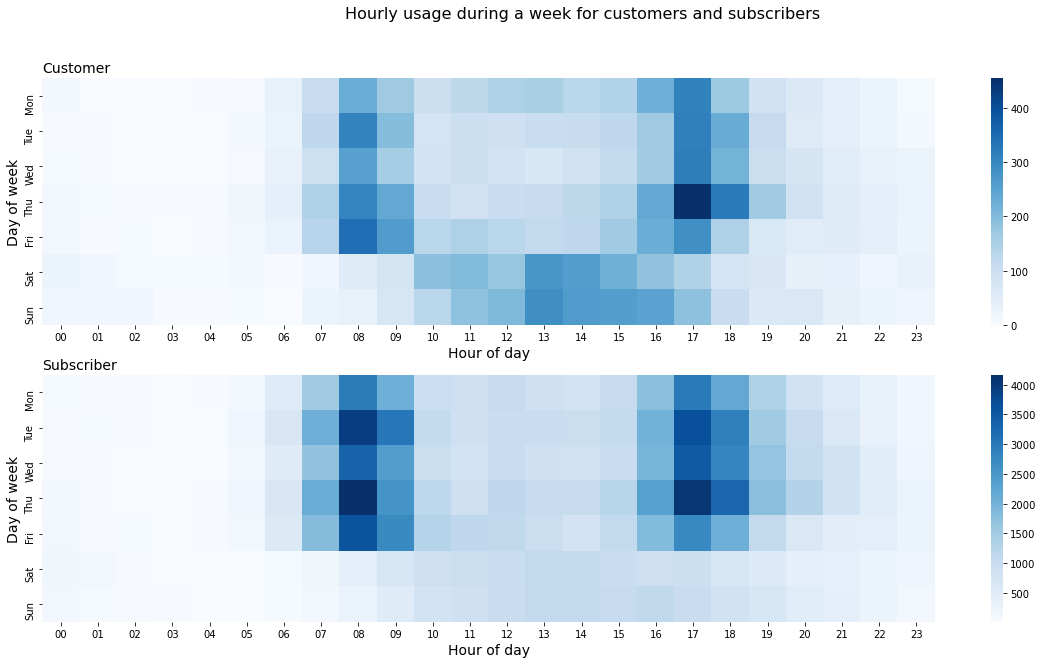

In [53]:


plt.figure(figsize=(20,10))

# plot on the left
plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
cus_counts = customers.groupby(['start_time_day', 'start_hr']).size()
cus_counts = cus_counts.reset_index(name='count')
cus_counts = cus_counts.pivot(index='start_time_day', columns='start_hr', values='count')
sb.heatmap(cus_counts, cmap="Blues")
plt.title('Customer', loc='left', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.ylabel('Day of week', fontsize=14)

# plot on the right
plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
sub_counts = subscribers.groupby(['start_time_day', 'start_hr']).size()
sub_counts = sub_counts.reset_index(name='count')
sub_counts = sub_counts.pivot(index='start_time_day', columns='start_hr', values='count')
sb.heatmap(sub_counts, cmap = 'Blues')
plt.title('Subscriber', loc='left', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.ylabel('Day of week', fontsize=14)

#plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16);

- Random customers rent bikes on weekends from 1pm to 5pm while subcribers dorminate the rental of bikes on weekdays during rush hours of the day from 7am to 9am and from 4pm to 6pm.

### Check the distribution of bike trips per day and duration for the top 10 starting points

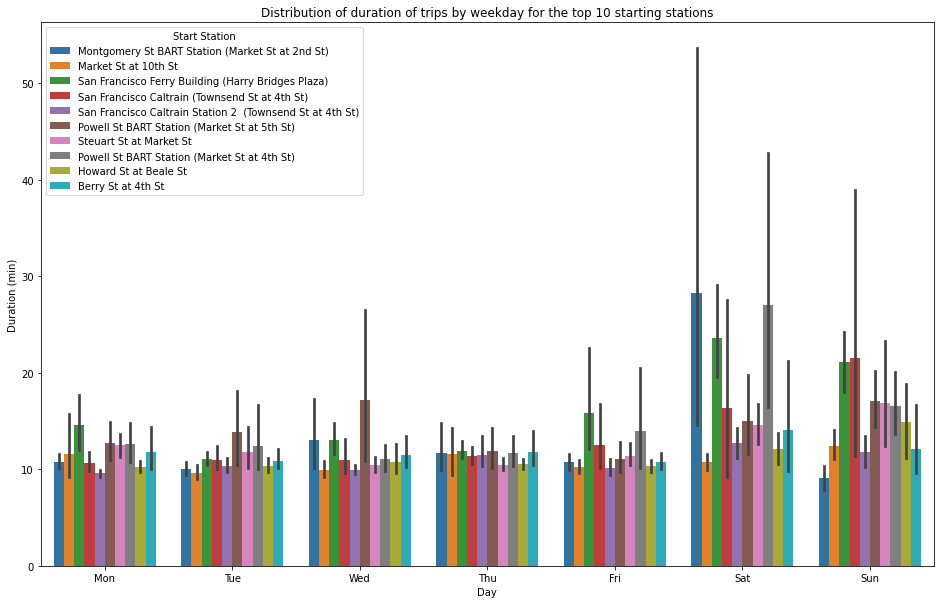

In [54]:
plt.figure(figsize=(16,10))
sb.barplot(data = top_starting_points_df, x = 'start_time_day', y = 'duration_min', hue = 'start_station_name', order = weekdays)
plt.xlabel('Day')
plt.ylabel('Duration (min)')
plt.title('Distribution of duration of trips by weekday for the top 10 starting stations')
plt.legend(title = 'Start Station')

- The number of trips for the various starting points seem to be random on weekdays. On Saturdays, bike rental from Montgomery St Bart Station and Powell St  Bart Station are extremely higher than other starting points in the Top 10 category.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The start station of most riders determines the overall nature of bike rental in the vicinity. This requires that enought bikes should be enough bikes at the station where bikes are usually rented especially during the rush hours of the day. Montgomery Bart Station has the highest number of rentals.

- Subscribers dorminate the rental of bikes during weekdays while same could be said of customers during weekends.

- Time spent by customers on bike usage is double the amount of time spent by subscribers.



### Were there any interesting or surprising interactions between features?

- The distance from the start to the end stations of most riders and the time spent is uncorrelated. This may be due to differences in the physical abilities of individuals to cycle.

## Conclusions
- Subscribers and customers have different reasons for renting bikes. From the heatmap, we could see that most subscribers cycle during the rush hours probably to catch the next means of transport for work while random customers use bikes most on weekend probably for pleasure. Thus subscribers could be commuters while random customers may be dorminated by tourists.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

